# ML Regression Project: Predicting Home Prices in Bangalore

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

## Cleaning the Dataset

In [8]:
df1=df.drop(["area_type","society","availability","balcony"],axis="columns")

In [9]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2=df1.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.shape

(13246, 5)

## Feature Engineering

In [13]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_15320\2433779651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [14]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3=df2.drop("size",axis="columns")

In [16]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [17]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Converting total square feets to float

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [19]:
df3[~(df3.total_sqft.apply(is_float))]


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [20]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [21]:
df3.describe()

,bath,price,bhk
count,13246.000000,13246.000000,13246.000000
mean,2.692586,112.389392,2.801902
std,1.341506,149.076587,1.295758
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


### Converting that square feets which are in the range using average of both of them

In [22]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df4=df3.copy()
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [24]:
df4.sample(10)

,location,total_sqft,bath,price,bhk
8411,Hoskote,1200.0,4.0,140.00,4
6128,Cunningham Road,2880.0,3.0,501.00,3
11271,Bisuvanahalli,845.0,2.0,32.00,2
2593,8th block Koramangala,1165.0,2.0,135.00,2
7978,Electronic City,605.0,1.0,13.31,1
2066,Indira Nagar,1650.0,3.0,200.00,3
4403,Doddanekundi,3250.0,5.0,850.00,4
679,Byrathi Village,1200.0,5.0,100.00,5
2858,Binny Pete,660.0,1.0,54.00,1
5543,Thigalarapalya,2215.0,4.0,160.00,3


In [25]:
df4.loc[20]

location      Kengeri
total_sqft      600.0
bath              1.0
price            15.0
bhk                 1
Name: 20, dtype: object

#### In the above case the total square feet is now the average of the two given in the range 

### Adding price per square feet column

In [26]:
df5=df4.copy()

In [27]:
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


### Now its the time to examine the locations and to apply dimentionality reduction technique in order to reduce the no of locations

In [28]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.location.value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats)

1293

In [30]:
location_stats.sum()

13246

In [31]:
len(location_stats[location_stats>10])

241

In [32]:
len(location_stats[location_stats<=10])

1052

### Reducing the number of locations by making the location name to other with less number of homes available  

In [33]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [34]:
location_stats_less_than_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [35]:
df5.location=df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df5.sample(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
10079,other,2300.0,3.0,280.00,3,12173.913043
10451,NRI Layout,1789.0,3.0,75.00,3,4192.286193
524,Jakkur,5230.0,6.0,465.00,4,8891.013384
3545,Narayanapura,1485.0,3.0,85.00,3,5723.905724
4819,Sarjapur Road,1500.0,3.0,88.00,3,5866.666667
10861,Narayanapura,1469.0,2.0,99.14,2,6748.808713
7649,Kundalahalli,1496.0,2.0,78.00,3,5213.903743
8487,Sarjapura - Attibele Road,3750.0,6.0,295.00,5,7866.666667
8334,other,940.0,2.0,56.00,2,5957.446809
7298,Arekere,1200.0,8.0,225.00,8,18750.000000


In [36]:
location_stats_=df5.location.value_counts(ascending=False)
len(df5.location.unique())

242

In [37]:
len(location_stats_)

242

## Outliers removal using business logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [38]:
df5["sqft_per_bedroom"]=df5["total_sqft"]/df5["bhk"]
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,600.0


In [39]:
df5=df5[df5["sqft_per_bedroom"]>=300]

In [40]:
df5.shape

(12456, 7)

## Outlier Removal Using Standard Deviation and Mean

In [41]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [42]:
m=np.mean(df5.price_per_sqft)
m

6308.502826047989

In [43]:
sd=np.std(df5.price_per_sqft)
sd

4167.960021110153

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df5)
df7.shape

(10241, 7)

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [45]:
def plot_scatter(dfff,location):
    bhk2=dfff[(dfff.location==location) & (dfff.bhk==2)]
    bhk3=dfff[(dfff.location==location) & (dfff.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color="red",marker="+",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="blue",s=50)
    plt.xlabel("Total Sqft")
    plt.ylabel("Price")
    plt.legend
    plt.title("location")

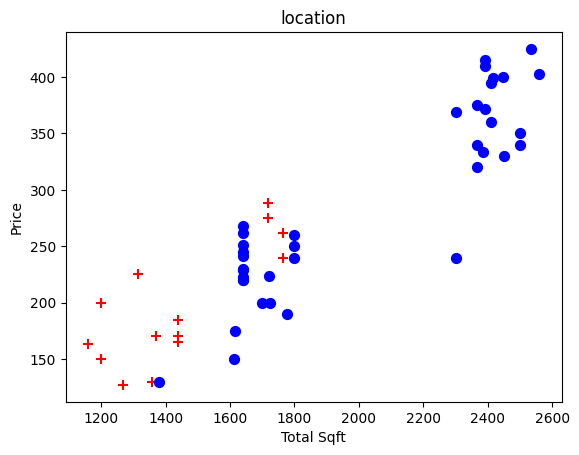

In [46]:
plot_scatter(df7,"Rajaji Nagar")

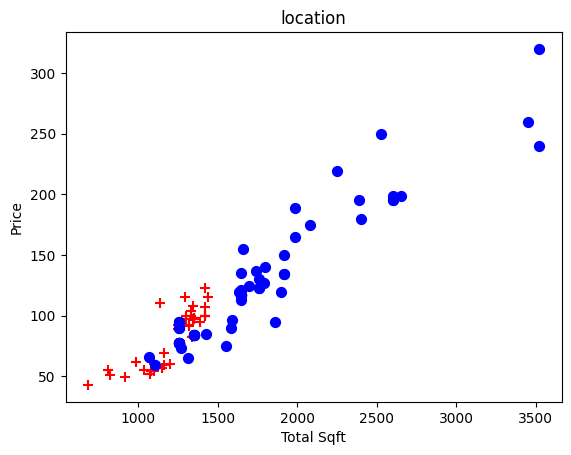

In [47]:
plot_scatter(df7,"Hebbal")

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{<br>
    '1' : {<br><br>
        'mean': 4000,<br>
        'std: 2000,<br>
        'count': 34<br>
    },<br>
    '2' : {<br>
        'mean': 4300,<br>
        'std: 2300,<br>
        'count': 22<br>
    },    <br>
}<br>

### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape
                                                  
                                              
                                            
                                            
            

(7329, 7)

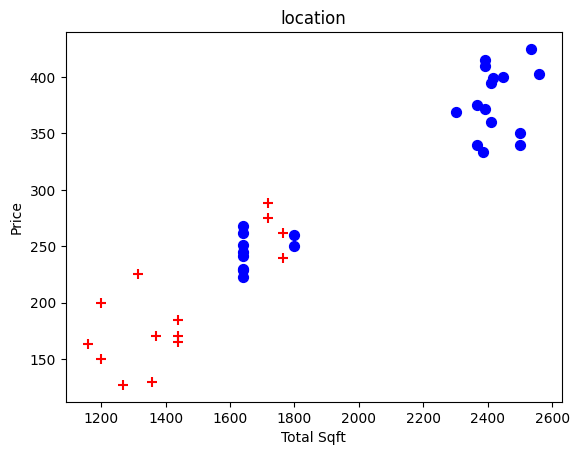

In [50]:
plot_scatter(df8,"Rajaji Nagar")

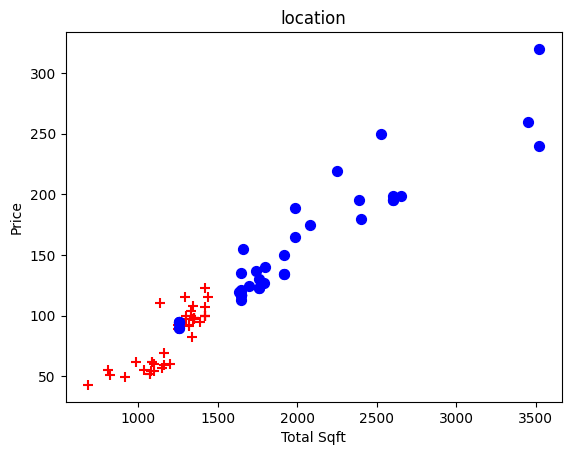

In [51]:
plot_scatter(df8,"Hebbal")

### As we can see that the outliers based on bhk and price are removed 


### Now lets remove the outliers based on the number of bathrooms.

In [52]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,712.500000
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,543.333333
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,625.000000
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,400.000000
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,617.500000


In [53]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000,400.000000
8486,other,12000.0,12.0,525.0,10,4375.000000,1200.000000
8575,other,10000.0,16.0,550.0,16,5500.000000,625.000000
9308,other,6000.0,12.0,150.0,11,2500.000000,545.454545
9639,other,5425.0,13.0,275.0,13,5069.124424,417.307692


<function matplotlib.pyplot.show(close=None, block=None)>

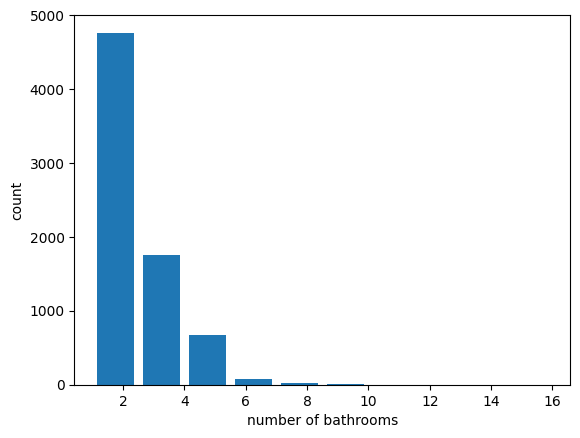

In [60]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")
plt.show

In [63]:
len(df8[df8.bath>df8.bhk+2])

4

In [64]:
df9=df8[df8.bath<=df8.bhk+2]

In [65]:
df9.shape

(7325, 7)

In [66]:
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,sqft_per_bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,712.500000
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,543.333333
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,625.000000
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,400.000000
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,617.500000


### Lets drop the number of columns which are not necessary 

In [67]:
df9.drop(["price_per_sqft","sqft_per_bedroom"],axis="columns",inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15320\2104002521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.drop(["price_per_sqft","sqft_per_bedroom"],axis="columns",inplace=True)


In [68]:
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## One Hot Encoding

In [74]:
dummies=pd.get_dummies(df9.location)

In [81]:
df10=pd.concat([df9,dummies],axis="columns")

In [82]:
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df10.drop("other",axis="columns",inplace=True)

In [84]:
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X=df10.drop(["price","location"],axis="columns")

In [103]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
y=df10.price

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
len(X_train)

5860

In [96]:
len(X_test)

1465

## Linear Regression Model

In [97]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8566160453796762

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [101]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

## Now lets use the GridSeearchCV in order to get the best possible model for this

In [102]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.834855,{'normalize': True}
1,lasso,0.684416,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.746258,"{'criterion': 'mse', 'splitter': 'random'}"


#### As we an see that Linear Regression is the best model for this dataset

## Test the model for few properties

In [109]:
loc_index = np.where(X.columns=='1st Phase JP Nagar')[0][0]
loc_index


4

In [111]:
x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [117]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])

In [118]:
predict_price("1st Phase JP Nagar",1000,2,2)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([82.95574151])

## Export the tested model to a pickle file

In [119]:
import pickle 
with open("bangalore_house_prediction.pickle",'wb') as f:
    pickle.dump(model,f)